## Milestone 4 Example Solution

_Using the test set, compute and plot a confusion matrix of all command words._

In [1]:
# Define the required variables as did in previous milestones
from pathlib import Path
import pandas

current_dir = Path('.')
data_path = current_dir / 'google_speech'
train_audio_path = data_path / 'train' / 'audio'
train_data = pandas.read_csv(data_path / "train" / "train.csv")
example_audio_path = train_audio_path / 'zero' / 'ffd2ba2f_nohash_1.wav'

In [2]:
# Let's load the arrays containing the training and test dataset created in the previous milestone,
# together with the predictions of the model trained previously
import numpy as np

with np.load('arrays.npz') as data:
    y_pred = data['y_pred']
    y_test = data['y_test']
    y_train = data['y_train']
    X_test = data['X_test']
    X_train = data['X_train']

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt
import pandas
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


<AxesSubplot:>

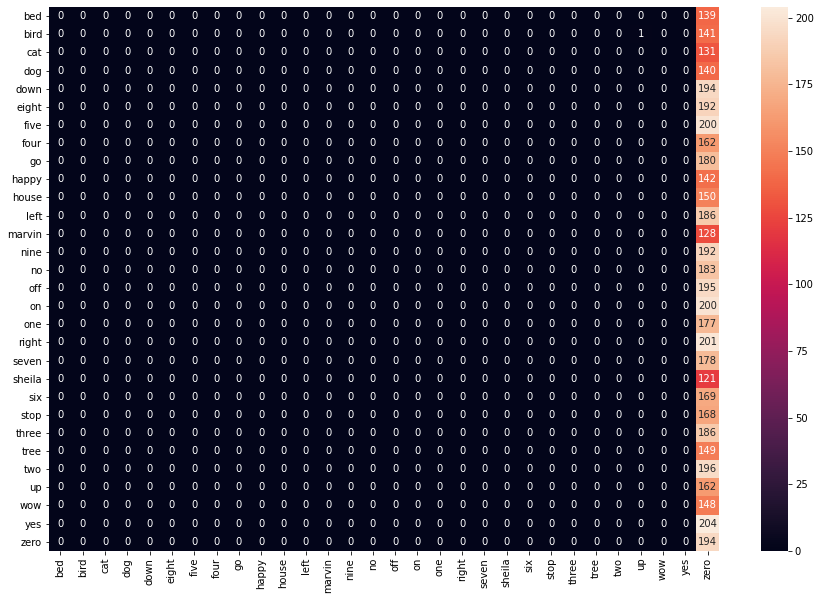

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(train_data[["label"]])

plt.figure(figsize=(15,10))
seaborn.heatmap(
    pandas.DataFrame(
        confusion_matrix(y_test, y_pred),
        index=encoder.classes_,
        columns=encoder.classes_
    ),
    fmt='d',
    annot=True
)

_Consider and evaluate options for optimizing the network architecture_

In [5]:
from tensorflow import keras

In [6]:
input_shape = (128, 32, 1) # same as the previous milestone
n_classes = 30

In [7]:
opt_net = keras.models.Sequential(
    [
        keras.layers.Convolution2D(
            input_shape=input_shape,
            filters=8,
            kernel_size=(3,3),
            activation="relu",
        ),
        keras.layers.MaxPooling2D(
            pool_size=(2,2)
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Convolution2D(
            filters=16,
            kernel_size=(3,3),
            activation="relu"
        ),
        keras.layers.MaxPooling2D(
            pool_size=(2,2)
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Convolution2D(
            filters=32,
            kernel_size=(3,3),
            activation="relu"
        ),
        keras.layers.MaxPooling2D(
            pool_size=(2,2)
        ),
        keras.layers.BatchNormalization(),
        keras.layers.Flatten(),
        keras.layers.Dense(
            units=64,
            activation="relu"
        ),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(
            units=32,
            activation="relu"
        ),
        keras.layers.Dropout(0.2),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(
            units=n_classes,
            activation="softmax"
        )
        
    ]
)

In [8]:
opt_net.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=[
        "accuracy", 
    ]
)

In [9]:
history = opt_net.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=True,
    validation_split=0.2,
    callbacks=[
        keras.callbacks.EarlyStopping(
            monitor="val_accuracy",
            min_delta=0.0001,
            patience=4,
        )
    ],
)

Epoch 1/100
1150/1150 [==============================] - 67s 57ms/step - loss: 2.4610 - accuracy: 0.2996 - val_loss: 1.5113 - val_accuracy: 0.5813
Epoch 2/100
1150/1150 [==============================] - 62s 53ms/step - loss: 1.4711 - accuracy: 0.5637 - val_loss: 1.0974 - val_accuracy: 0.6834
Epoch 3/100
1150/1150 [==============================] - 62s 54ms/step - loss: 1.1144 - accuracy: 0.6727 - val_loss: 0.9065 - val_accuracy: 0.7305
Epoch 4/100
1150/1150 [==============================] - 61s 53ms/step - loss: 0.9540 - accuracy: 0.7174 - val_loss: 0.6185 - val_accuracy: 0.8200
Epoch 5/100
1150/1150 [==============================] - 62s 54ms/step - loss: 0.8465 - accuracy: 0.7497 - val_loss: 0.5517 - val_accuracy: 0.8440
Epoch 6/100
1150/1150 [==============================] - 61s 53ms/step - loss: 0.7875 - accuracy: 0.7669 - val_loss: 0.5168 - val_accuracy: 0.8467
Epoch 7/100
1150/1150 [==============================] - 60s 52ms/step - loss: 0.7419 - accuracy: 0.7810 - val_loss: 0

In [10]:
pred = opt_net.predict(X_test)
y_pred_opt = np.argmax(pred, axis=1)

In [11]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_score(y_test, y_pred_opt)

0.8825601879036994

In [12]:
f1_score(y_test, y_pred_opt, average="macro")

0.8832654919729279

<AxesSubplot:>

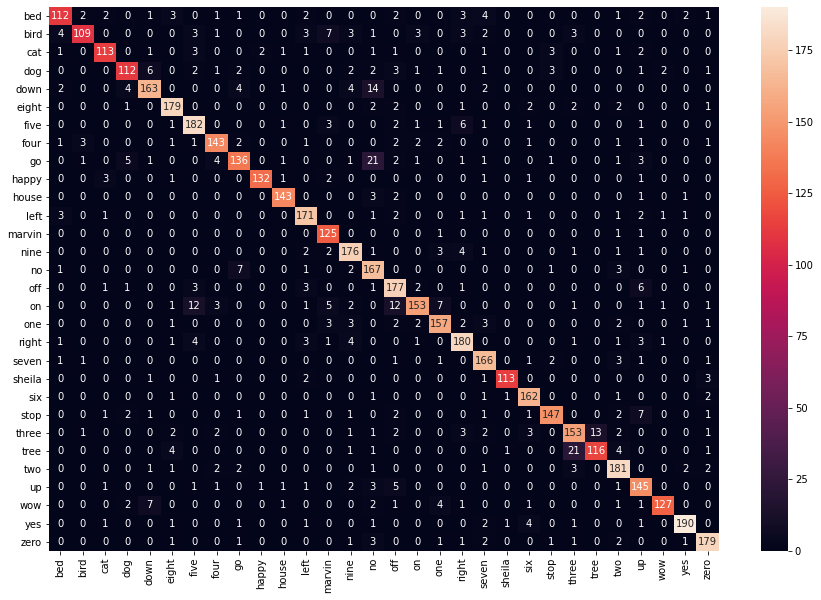

In [13]:
plt.figure(figsize=(15,10))
seaborn.heatmap(
    pandas.DataFrame(
        confusion_matrix(y_test, y_pred_opt),
        index=encoder.classes_,
        columns=encoder.classes_
    ),
    fmt='d',
    annot=True
)